In [14]:
import pandas as pd
from wave import open as open_wave
import numpy as np
from scipy import signal
from scipy.signal import stft

from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.signal import welch

## Opening the audio file to construct the signal

### There are three audio files 

##### The names of the audio files is the format 'Audio_<date>_<time>.wav'. The three instance are as follows - 
##### event 1: 2024-03-09_23.41.07
##### event 2: 2024-03-10_11.21.01
##### event 3: 2024-03-10_13.13.06

##### Each of the above instances are used to create the analysis below. 

In [24]:
n= str('2024-03-10_11.21.01') # event instances mentioned above number of the audio file.  
ch=2

In [25]:
raw = open_wave(f'Audio_{n}_Ch{ch}.wav','rb')
signal= raw.readframes(-1)

signal = np.frombuffer(signal, dtype=np.int16)

f_rate=raw.getframerate() 

### creating a time vector to plot the signal  

In [26]:
time = np.linspace( 
        0, # start 
        len(signal) / f_rate, 
        num = len(signal) 
    ) 

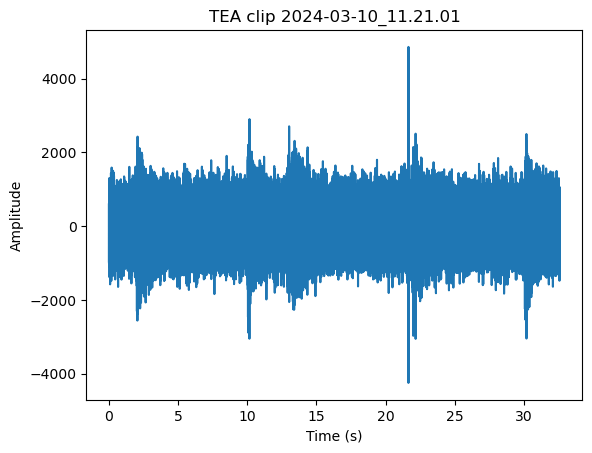

In [27]:
plt.figure(1) 
plt.title('TEA clip '+ n) 
plt.xlabel('Time (s)') 
plt.ylabel('Amplitude')
plt.plot(time, signal) 
plt.savefig('./plots/tea_'+n+'_ch'+str(ch)+'_signal.png')
plt.show() 

## METHOD 1: Finding dominant frequencies using FFT 

##### we use fourier transform analysis to identify coonstituent frequencies in the above signal. Note that we do not use the 'rfft' or real FFT even if the signal is real. The reason for this is to retain the directionality of frequencies i.e. +ve or forward going frequencies or -ve or reverse frequencies. These can potentially be a way of identifying/separating out the frequency of the vibrations. 

##### for example: the instrument can have a base continuum sound with a specific frequency(s) that can be identied as positive while an unexpected/resistive vibration could be detected as a -ve frequency. 

In [28]:
sig_fft=fft(signal)
power = np.abs(sig_fft)**2
sample_freq = fftfreq(len(signal),time)


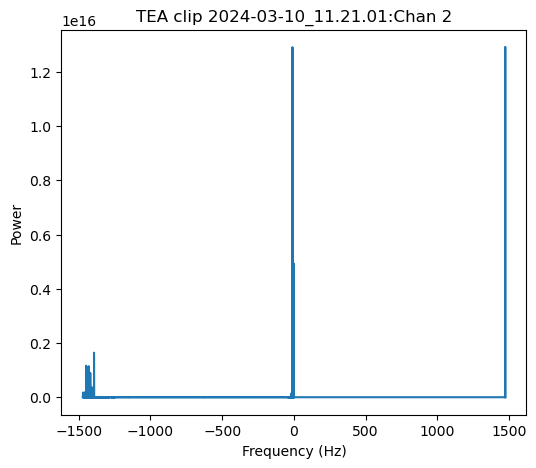

In [29]:
plt.figure(figsize=(6, 5))
plt.plot(sample_freq*f_rate, power)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.title('TEA clip '+n+':Chan '+str(ch))
plt.savefig('./plots/tea_'+n+'_ch'+str(ch)+'_fft_freq.png')
plt.show()

### Conclusion: This analysis cannot give us a conlusive identification of the frequency of the vibrations as it just shows us the frequency composition of the signal.
#### This is applicable to all the three audio signals even if two of them were captured during the top-end assembly vibration event. 


## METHOD 2: Finding vibrations in frequency domain using Power spectral density (PSD) 

#### We use Power Spectrum desnity as another method to determine the power distribution across frequency. This method is also more useful to identify the vibration if any across the entire frequency range. 

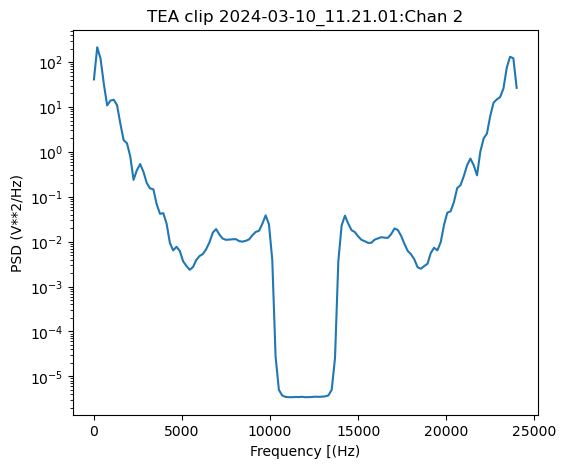

In [30]:
f, Pxx_den = welch(signal, f_rate, nperseg=256)
plt.figure(figsize=(6, 5))
plt.semilogy(f, Pxx_den)
#plt.ylim([0.5e-3, 1])
plt.title('TEA clip '+n+':Chan '+str(ch))
plt.xlabel('Frequency [(Hz)')
plt.ylabel('PSD (V**2/Hz)')
plt.savefig('./plots/tea_'+n+'_ch'+str(ch)+'_psd.png')
plt.show()

## SPECTROGRAM

#### A spectrogram is essentially a plotv that shows the distribution of frequency across time. Any time-sensitive frequency changes should hence be identifiable on this plot. 
#### The following method uses a short-time fourier transform and the colour shading on the plot indicate the amplitude (bright yellow being the highest amplitude)  

In [31]:
f, t, Zxx = stft(signal, f_rate, window="hamming", nperseg=256)

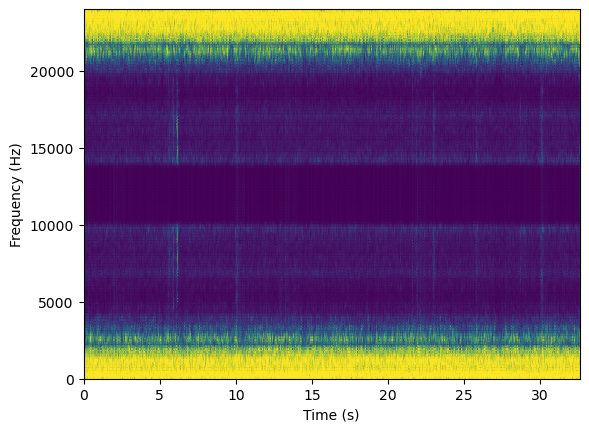

In [32]:

plt.pcolormesh(t, f, np.abs(Zxx), vmin=0,vmax=13, shading="gouraud")
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.savefig('./plots/tea_'+n+'_ch'+str(ch)+'_spectrogram.png')
plt.show()
